In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd /content/gdrive/MyDrive/Colab Notebooks/21 - Pytorch/

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/21 - Pytorch


In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

# Model Training

In [ ]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)

In [ ]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

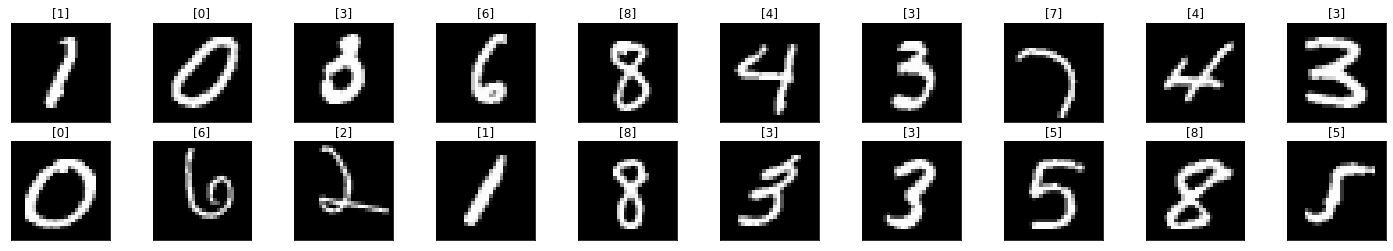

In [ ]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title([labels[idx].item()])

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        # first convolutional layer, input with depth of 1(1 channel of greyscale)
        # kernel layer depth of 20 channels, size of 5, stride length of 1 (move one pixel each)
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        # 20 channels(from previous layer) as input, 50 kernel layer, size of 5 and stride length of 1
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        # 28 -> 24(convo)->12(pooling)->8(convo)->4(pooling), 4*4*50 will be the input
        # output layer to be 500 nodes
        self.fc1 = nn.Linear(4*4*50, 500)
        # 0.5 as the rate of dropout
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)
    def forward(self, x):
        # call out convolutional layer
        x = F.relu(self.conv1(x))
        # pooling layer
        x = F.max_pool2d(x, 2, 2)
        # call out convolutional layer
        x = F.relu(self.conv2(x))
        # pooling layer
        x = F.max_pool2d(x, 2, 2)
        # flatten to 1-d array
        x = x.view(-1, 4*4*50)
        # relu activation function
        x = F.relu(self.fc1(x))
        # drop random nodes to prevent overfitting
        x = self.dropout1(x)
        # no activation function applied, as crossentropy will be applied later
        x = self.fc2(x)
        return x

In [ ]:
model = LeNet()
model

LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [ ]:
epochs = 10
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0
  
    for inputs, labels in training_loader:
        inputs = inputs
        labels = labels
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs
                val_labels = val_labels
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.5899, acc 83.9917 
validation loss: 0.1815, validation acc 94.5300 
epoch : 2
training loss: 0.1489, acc 95.5950 
validation loss: 0.1037, validation acc 96.9600 
epoch : 3
training loss: 0.0982, acc 97.0867 
validation loss: 0.0726, validation acc 97.7600 
epoch : 4
training loss: 0.0767, acc 97.7100 
validation loss: 0.0610, validation acc 98.1200 
epoch : 5
training loss: 0.0635, acc 98.0783 
validation loss: 0.0498, validation acc 98.4200 
epoch : 6
training loss: 0.0549, acc 98.3317 
validation loss: 0.0426, validation acc 98.6700 
epoch : 7
training loss: 0.0482, acc 98.5017 
validation loss: 0.0398, validation acc 98.7100 
epoch : 8
training loss: 0.0434, acc 98.7050 
validation loss: 0.0399, validation acc 98.7500 
epoch : 9
training loss: 0.0393, acc 98.8050 
validation loss: 0.0417, validation acc 98.5900 
epoch : 10
training loss: 0.0356, acc 98.9033 
validation loss: 0.0348, validation acc 98.8100 


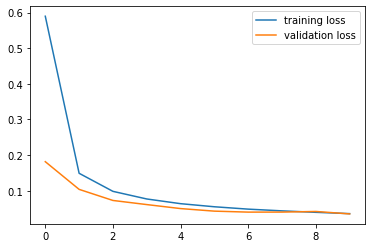

In [ ]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

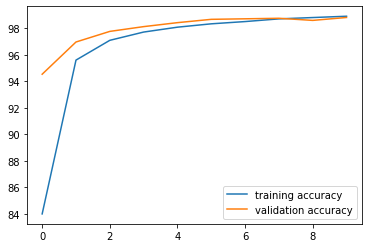

In [ ]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

# Testing

In [ ]:
import PIL.ImageOps

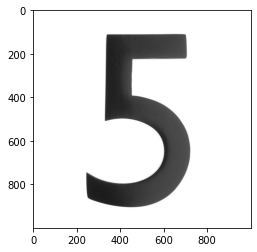

In [ ]:
import requests
from PIL import Image

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

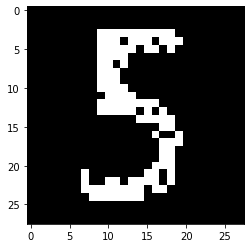

In [ ]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img) 
plt.imshow(im_convert(img))

In [ ]:
images = img
image = images[0].unsqueeze(0).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(pred.item())

5


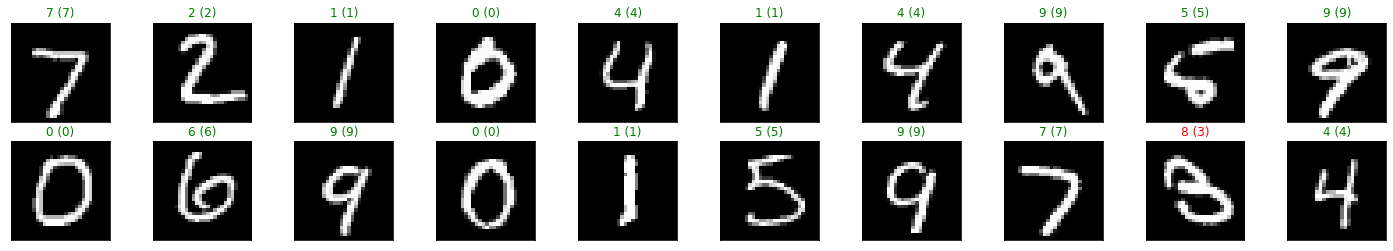

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))